# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Load data

In [70]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [67]:
df_test.isna().sum()

ID                           0
DATE_DEPARTURE_UTC           0
DATE_ARRIVAL_UTC             0
DATE_DEPARTURE_LCL           0
DATE_ARRIVAL_LCL             0
ORIGIN                       0
ORIGIN_AIRPORT_ID            0
DEST                         0
DEST_AIRPORT_ID              0
TAIL_NUM                     0
OP_CARRIER                   0
OP_CARRIER_AIRLINE_ID        0
OP_CARRIER_FL_NUM            0
DISTANCE                  7550
CANCELLED                    0
DEP_DEL15                62923
dtype: int64

In [68]:
def fill_missing(df, df_train):
    df['Origin_Dest_Carrier'] = df['ORIGIN'].str.cat(df['DEST'], sep='_').str.cat(df['OP_CARRIER'], sep='_')
    df['DEP_DEL15'] = df['DEP_DEL15'].fillna(df_train.groupby('Origin_Dest_Carrier')['DEP_DEL15'].transform('mean'))

    df['DISTANCE'] = df['DISTANCE'].fillna(df_train['DISTANCE'].mean())
    df['DEP_DEL15'] = df['DEP_DEL15'].fillna(0)
    
    return df

In [69]:
df_train = fill_missing(df_train, df_train)
df_test = fill_missing(df_test, df_train)

# Exploration

In [8]:
df_train.head(5)

,ID,DATE_DEPARTURE_UTC,DATE_ARRIVAL_UTC,DATE_DEPARTURE_LCL,DATE_ARRIVAL_LCL,ORIGIN,ORIGIN_AIRPORT_ID,DEST,DEST_AIRPORT_ID,TAIL_NUM,OP_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,DISTANCE,CANCELLED,DEP_DEL15,ARR_DEL15
0,345355,2020-01-18 22:10:00,2020-01-18 23:59:00,2020-01-18 15:10:00,2020-01-18 15:59:00,SLC,14869,SNA,14908,N128DU,DL,19790,1056,588.0,0,0.0,0
1,323447,2020-01-17 21:47:00,2020-01-18 04:10:00,2020-01-17 16:47:00,2020-01-17 20:10:00,BOS,10721,SEA,14747,N486AS,AS,19930,15,2496.0,0,NaN,0
2,242237,2020-01-13 13:26:00,2020-01-13 14:26:00,2020-01-13 07:26:00,2020-01-13 08:26:00,DAL,11259,HOU,12191,N901WN,WN,19393,3,239.0,0,NaN,0
3,271408,2020-01-15 02:45:00,2020-01-15 03:37:00,2020-01-14 20:45:00,2020-01-14 21:37:00,STL,15016,DSM,11423,N778SW,WN,19393,1588,259.0,0,0.0,0
4,282447,2020-01-15 23:22:00,2020-01-16 00:49:00,2020-01-15 18:22:00,2020-01-15 19:49:00,CLT,11057,CHS,10994,N579NN,OH,20397,5207,168.0,0,NaN,1


In [9]:
df_train.dtypes

ID                         int64
DATE_DEPARTURE_UTC        object
DATE_ARRIVAL_UTC          object
DATE_DEPARTURE_LCL        object
DATE_ARRIVAL_LCL          object
ORIGIN                    object
ORIGIN_AIRPORT_ID          int64
DEST                      object
DEST_AIRPORT_ID            int64
TAIL_NUM                  object
OP_CARRIER                object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER_FL_NUM          int64
DISTANCE                 float64
CANCELLED                  int64
DEP_DEL15                float64
ARR_DEL15                  int64
dtype: object

Categorical Columns:
- ORIGIN: 3-letter Airport ID
- ORIGIN_AIRPORT_ID: Numeric Airport ID
- DEST: 3-letter Airport ID
- DEST_AIRPORT_ID: Numeric Airport ID
- OP_CARRIER: 2-letter Airline ID
- OP_CARRIER_AIRLINE_ID:  Numeric Airline ID
- OP_CARRIER_FL_NUM: Numeric Flight Number
- CANCELLED: Boolean

In [72]:
df_train['CANCELLED'].value_counts()

0    419487
Name: CANCELLED, dtype: int64

In [10]:
df_train[['ORIGIN','DEST','OP_CARRIER']].describe()

,ORIGIN,DEST,OP_CARRIER
count,419487,419487,419487
unique,351,350,17
top,ATL,ATL,WN
freq,22241,22393,75801


In [11]:
df_train[['OP_CARRIER_FL_NUM','CANCELLED']].describe()

,OP_CARRIER_FL_NUM,CANCELLED
count,419487.000000,419487.0
mean,2628.837404,0.0
std,1825.643818,0.0
min,1.000000,0.0
25%,1073.000000,0.0
50%,2184.000000,0.0
75%,4115.000000,0.0
max,6799.000000,0.0


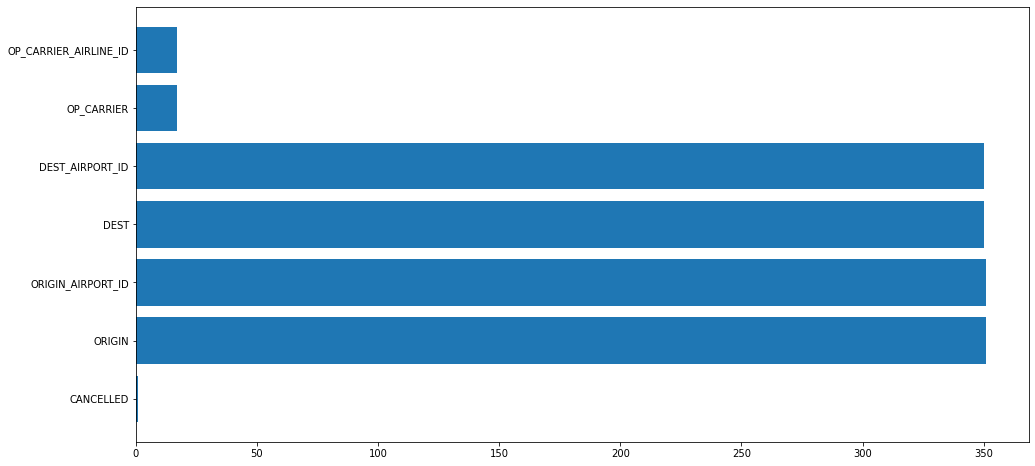

In [12]:
cols = ['CANCELLED','ORIGIN','ORIGIN_AIRPORT_ID','DEST','DEST_AIRPORT_ID','OP_CARRIER','OP_CARRIER_AIRLINE_ID']
fig, ax = plt.subplots(1,1,figsize=(16,8))
ax.barh(cols, df_train[cols].nunique())
plt.show()

KeyError: 'ORIGIN'

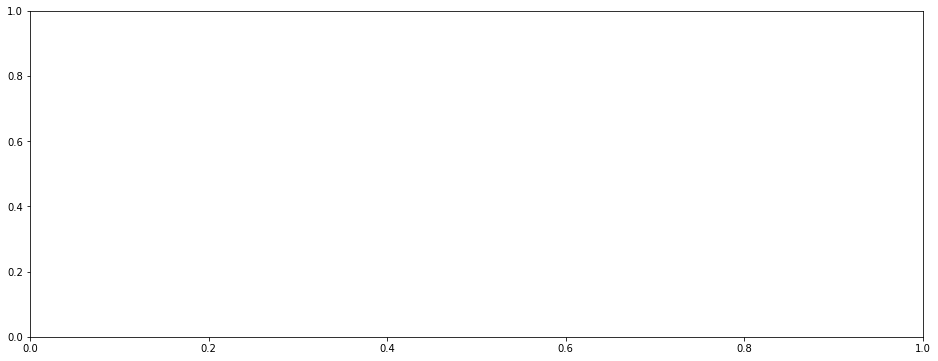

In [65]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
ax.bar(df_train['ORIGIN'].value_counts().index, df_train['ORIGIN'].value_counts())

plt.show()

In [14]:
df_train['ORIGIN'].value_counts()[df_train['ORIGIN'].value_counts()>1000]

ATL    22241
ORD    17135
DFW    16679
DEN    14145
CLT    13903
       ...  
TUS     1181
BOI     1165
RNO     1159
GRR     1072
BHM     1064
Name: ORIGIN, Length: 71, dtype: int64

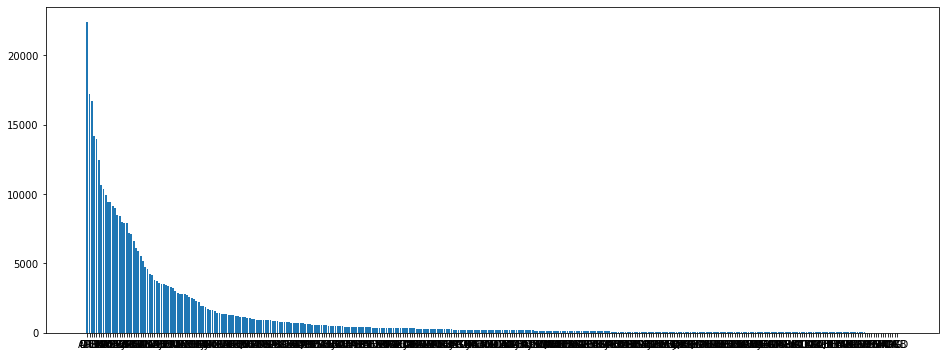

In [15]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
ax.bar(df_train['DEST'].value_counts().index, df_train['DEST'].value_counts())
plt.show()

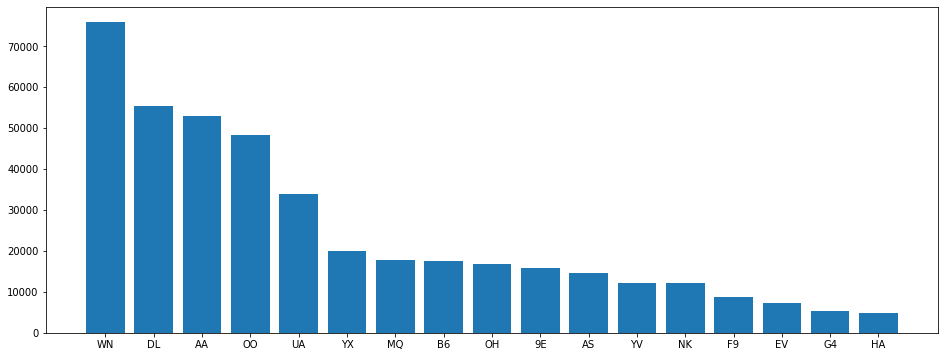

In [16]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
ax.bar(df_train['OP_CARRIER'].value_counts().index, df_train['OP_CARRIER'].value_counts())
plt.show()

# Transformations

Suggestions:
- drop columns that end with 'ID'
- columns 'CANCELLED','ORIGIN','DEST','OP_CARRIER' astype categorical
- one hot encode 'OP_CARRIER' (17 values)
- what shall we do with the airports? ~350 unique values

In [28]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [ ]:
df_train = df_train.set_index('ID')

In [30]:
df_test.columns

Index(['ID', 'DATE_DEPARTURE_UTC', 'DATE_ARRIVAL_UTC', 'DATE_DEPARTURE_LCL',
       'DATE_ARRIVAL_LCL', 'ORIGIN', 'ORIGIN_AIRPORT_ID', 'DEST',
       'DEST_AIRPORT_ID', 'TAIL_NUM', 'OP_CARRIER', 'OP_CARRIER_AIRLINE_ID',
       'OP_CARRIER_FL_NUM', 'DISTANCE', 'CANCELLED', 'DEP_DEL15'],
      dtype='object')

# Transformation CODE

In [56]:
# get value mappings
origin_map = df_train['ARR_DEL15'].groupby(df_train['ORIGIN']).mean()
dest_map = df_train['ARR_DEL15'].groupby(df_train['DEST']).mean()

# get airline encoder
import category_encoders as ce
airline_encoder = ce.one_hot.OneHotEncoder(use_cat_names=True).fit(df_train[['OP_CARRIER']])

In [57]:
def transform_categoricals(df, origin_map, dest_map):
    # replace airport IDs by percent delayed
    df['ORIGIN_PCT_DELAY'] = df['ORIGIN'].map(origin_map)
    df['DEST_PCT_DELAY'] = df['DEST'].map(origin_map)
    
    # transform dtypes
    df[['OP_CARRIER']] = df[['OP_CARRIER']].astype('category')
    
    # drop redundant columns
    df = df.drop(columns=['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'OP_CARRIER_AIRLINE_ID','ORIGIN','DEST'])
    
    # transform airline into dummies
    df_airline_dummys = airline_encoder.transform(df['OP_CARRIER'])
    df = df.drop(columns=['OP_CARRIER'])
    df = df.merge(df_airline_dummys, how='left', left_index=True, right_index=True)
    
    return df

In [ ]:
['ORIGIN_PCT_DELAY','DEST_PCT_DELAY']

In [58]:
# transform datasets
df_train = transform_categoricals(df_train, origin_map, dest_map)
df_test = transform_categoricals(df_test, origin_map, dest_map)

# SCRATCH

In [49]:
def transform_categoricals(df, origin_map, dest_map):
    # replace airport IDs by percent delayed
    df['ORIGIN_PCT_DELAY'] = df['ORIGIN'].map(origin_map)
    df['DEST_PCT_DELAY'] = df['DEST'].map(origin_map)
    
    # transform dtypes
    df[['OP_CARRIER']] = df[['OP_CARRIER']].astype('category')
    
    # drop redundant columns
    df = df.drop(columns=['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'OP_CARRIER_AIRLINE_ID','ORIGIN','DEST'])
    
    # transform airline into dummies
    vars_to_encode = ['OP_CARRIER']
    df_airline_dummys = pd.get_dummies(df[vars_to_encode])
    df = df.drop(columns=vars_to_encode)
    df = df.merge(df_airline_dummys, how='left', left_index=True, right_index=True)
    
    return df

In [26]:
def transform_categoricals(df):
    # replace least frequent airports by 'other'
    minimum_count = 1000
    df.loc[df['ORIGIN'].map(df['ORIGIN'].value_counts())<minimum_count,'ORIGIN'] = 'OTHER'
    df.loc[df['DEST'].map(df['DEST'].value_counts())<minimum_count,'DEST'] = 'OTHER'
    
    # transform dtypes
    df[['CANCELLED','ORIGIN','DEST','OP_CARRIER']] = df[['CANCELLED','ORIGIN','DEST','OP_CARRIER']].astype('category')
    
    # drop redundant columns
    df = df.drop(columns=['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'OP_CARRIER_AIRLINE_ID'])
    
    # transform airline & airport variable into dummies
    vars_to_encode = ['OP_CARRIER','ORIGIN','DEST']
    df_airline_dummys = pd.get_dummies(df[vars_to_encode])
    df = df.drop(columns=vars_to_encode)
    df = df.merge(df_airline_dummys, how='left', left_index=True, right_index=True)
    
    return df

In [ ]:
class categorical_transformer(TransformerMixin):
    
    def fit(self, df):
        self.airline_encoder = ce.one_hot.OneHotEncoder(use_cat_names=True).fit(df['OP_CARRIER'])
        self.origin_encoder = ce.one_hot.OneHotEncoder(use_cat_names=True).fit(df['ORIGIN'])
        self.dest_encoder = ce.one_hot.OneHotEncoder(use_cat_names=True).fit(df['DEST'])
        origin_counts = self.origin_encoder.transform(df['ORIGIN']).sum()
        self.drop_origins = self.origin_encoder.transform(df['ORIGIN']).sum()
        
    def transform(self, df):
        # transform dtypes
        df[['CANCELLED','ORIGIN','DEST','OP_CARRIER']] = df[['CANCELLED','ORIGIN','DEST','OP_CARRIER']].astype('category')
    
        # drop redundant columns
        df = df.drop(columns=['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'OP_CARRIER_AIRLINE_ID'])
        